**Note:** This notebook can run using TensorFlow 2.5.0

In [1]:
#!pip install tensorflow==2.5.0

# Multiple Layer LSTM

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

- Lab1과 동일

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

- Lab1과 달리 Lab2에서는 두 개의 LSTM layer를 가지고 학습을 진행
- tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)): 이전과 달리 return_sequences라는 parameter가 추가됨. 이를 통해 다음 LSTM layer로 값을 return할 수 있게 됨 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 318s 792ms/step - loss: 0.5450 - accuracy: 0.7240 - val_loss: 0.4837 - val_accuracy: 0.7916
Epoch 2/10
391/391 [==============================] - 309s 787ms/step - loss: 0.3865 - accuracy: 0.8388 - val_loss: 0.4976 - val_accuracy: 0.7775
Epoch 3/10
391/391 [==============================] - 306s 780ms/step - loss: 0.2868 - accuracy: 0.8883 - val_loss: 0.5148 - val_accuracy: 0.7543
Epoch 4/10
391/391 [==============================] - 305s 778ms/step - loss: 0.2696 - accuracy: 0.8943 - val_loss: 0.4791 - val_accuracy: 0.8150
Epoch 5/10
391/391 [==============================] - 304s 776ms/step - loss: 0.2163 - accuracy: 0.9202 - val_loss: 0.5066 - val_accuracy: 0.8061
Epoch 6/10
391/391 [==============================] - 304s 776ms/step - loss: 0.1757 - accuracy: 0.9362 - val_loss: 0.5705 - val_accuracy: 0.8091
Epoch 7/10
391/391 [==============================] - 304s 775ms/step - loss: 0.1453 - accuracy: 0.9495 - val_loss: 0.5848 -

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

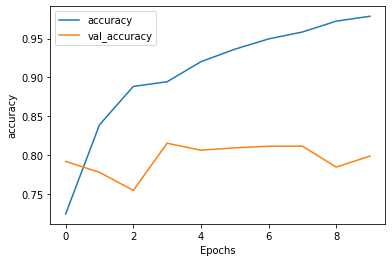

In [11]:
plot_graphs(history, 'accuracy')

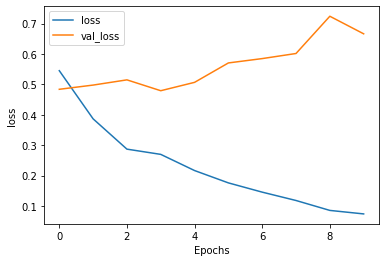

In [12]:
plot_graphs(history, 'loss')

- accuracy graph가 Single layer LSTM에서는 다소 거칠게 accuracy가 증가하는 경향을 보이지만, Double layer LSTM에서는 다소 완만하게 accuracy가 증가하는 결과를 확인할 수 있음
- 이는 epoch의 수를 증가해보면 확실하게 차이를 느낄 수 있는데, Single layer LSTM에서는 sharp한 Deep이 생기는 모습을 확인할 수 있고, 이는 학습 정확도에 확신을 주지 못하는 요소로 고려될 수 있음
- val_accuracy가 80% 정도를 유지하는 것은 8000개의 적은 데이터를 가지고 학습한 것을 고려하면 꽤 괜찮은 수치라고 생각할 수 있음